# 1. Import Library

In [49]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


#Import Library 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Import Dataset

In [3]:
# Import Dataset
df = pd.read_csv('./data/Phishing_Email.csv')

# 3. Understanding Dataset

In [4]:
# Menampilkan 5 data teratas
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [5]:
# Menampilkan 5 data terbawah
df.tail()

,Unnamed: 0,Email Text,Email Type
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email
18646,18647,request submitted : access request for anita ....,Safe Email
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,18649,press clippings - letter on californian utilit...,Safe Email
18649,18650,empty,Phishing Email


In [6]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [7]:
# Menampilkan statistik deskriptif dataset
df['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [8]:
# Menampilkan panjang karakter email
df['Email Text'] = df['Email Text'].astype(str)
df['length'] = df['Email Text'].apply(len)
df.head()

,Unnamed: 0,Email Text,Email Type,length
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,1030
1,1,the other side of * galicismos * * galicismo *...,Safe Email,479
2,2,re : equistar deal tickets are you still avail...,Safe Email,1245
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,688
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,441


# 4. Exploration Data Analysis (EDA)

### Data Cleaning

In [9]:
# Data Cleaning, Menghapus kolom yang tidak diperlukan
df_cleaned = df.drop(columns=['Unnamed: 0'])

In [10]:
# Mengecek data yang kosong pada dataset
missing_values = df_cleaned.isnull().sum()

# Menghapus data yang kosong pada kolom Email Text
df_cleaned = df_cleaned.dropna(subset=['Email Text'])

In [11]:
# Melakukan cross check data yang kosong pada dataset
missing_values = df_cleaned.isnull().sum()
print(missing_values)

Email Text    0
Email Type    0
length        0
dtype: int64


### Descriptive Statistics

In [12]:
# Menampilkan statistik deskriptif dataset
df_cleaned['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [13]:
# Menampilkan panjang karakter email
df['Email Text'] = df_cleaned['Email Text'].astype(str)
df['length'] = df_cleaned['Email Text'].apply(len)
df_cleaned.head()

,Email Text,Email Type,length
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,1030
1,the other side of * galicismos * * galicismo *...,Safe Email,479
2,re : equistar deal tickets are you still avail...,Safe Email,1245
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,688
4,software at incredibly low prices ( 86 % lower...,Phishing Email,441


### Visualization

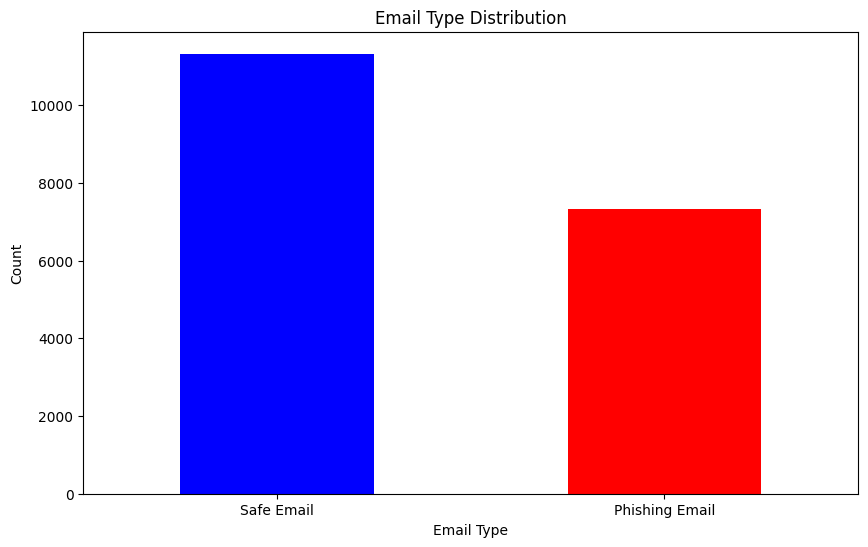

In [14]:
# Membuat variable email_type_distribution yang berisi jumlah email berdasarkan Email Type
email_type_distribution = df_cleaned['Email Type'].value_counts()

# Membuat plot jumlah email berdasarkan Email Type
plt.figure(figsize=(10, 6))
email_type_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Email Type Distribution')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Length of Text')

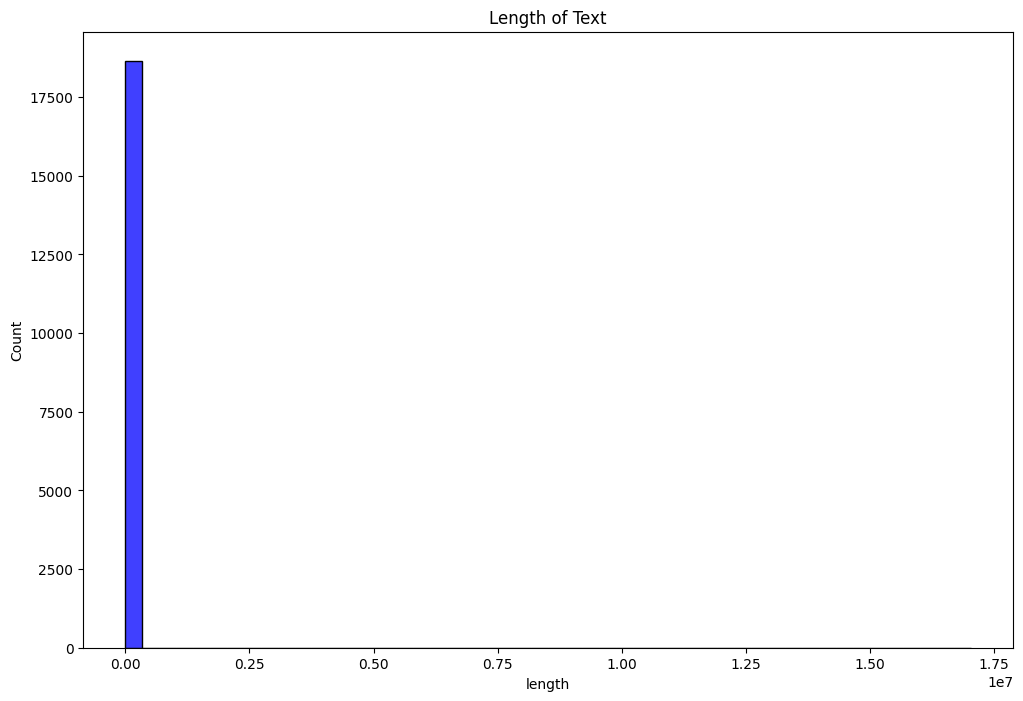

In [15]:
# Membuat plot panjang karakter email
plt.figure(figsize=(12,8))
sns.histplot(x='length',data=df_cleaned,bins=50, color='blue')
plt.title('Length of Text')

array([<Axes: title={'center': 'Phishing Email'}>,
       <Axes: title={'center': 'Safe Email'}>], dtype=object)

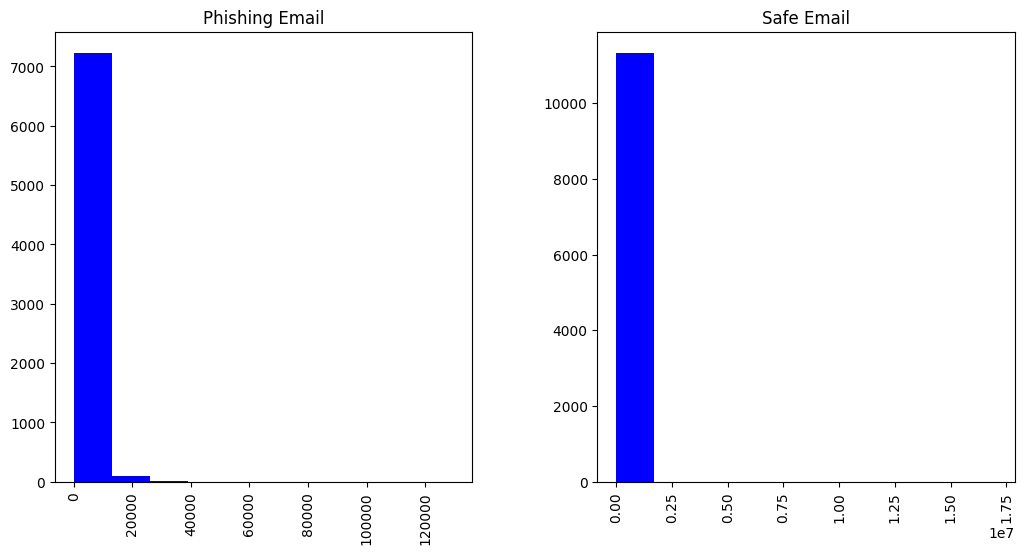

In [16]:
# Membuat plot panjang karakter email berdasarkan Email Type
df_cleaned.hist(column='length',by='Email Type', figsize=(12,6) , color='blue')

# 5. Preprocessing Data

### Preprocessing Function

In [17]:
# Mengaplikasikan fungsi preprocessing
df_cleaned['Email Text'] = df_cleaned['Email Text'].astype(str)

# Menghapus karakter khusus
df_cleaned = df_cleaned[df_cleaned['Email Text'].apply(lambda x: isinstance(x, str))]

### Tokenization

In [18]:
# Melakukan tokenisasi pada email text
df_cleaned['Tokenized Text'] = df_cleaned['Email Text'].apply(word_tokenize)

# Print the tokenized texts
print(df_cleaned['Tokenized Text'])

0        [re, :, 6, ., 1100, ,, disc, :, uniformitarian...
1        [the, other, side, of, *, galicismos, *, *, ga...
2        [re, :, equistar, deal, tickets, are, you, sti...
3        [Hello, I, am, your, hot, lil, horny, toy, ., ...
4        [software, at, incredibly, low, prices, (, 86,...
                               ...                        
18645    [date, a, lonely, housewife, always, wanted, t...
18646    [request, submitted, :, access, request, for, ...
18647    [re, :, important, -, prc, mtg, hi, dorn, &, j...
18648    [press, clippings, -, letter, on, californian,...
18649                                              [empty]
Name: Tokenized Text, Length: 18650, dtype: object


### Stopwords Removal


In [19]:
# Menghapus stopwords dari tokenized text
df_cleaned['Tokenized Text'] = df_cleaned['Tokenized Text'].apply(lambda x: [word for word in x if word.lower() not in stopwords.words('english')])

# Melakukan print tokenized text
print(df_cleaned['Tokenized Text'])

0        [:, 6, ., 1100, ,, disc, :, uniformitarianism,...
1        [side, *, galicismos, *, *, galicismo, *, span...
2        [:, equistar, deal, tickets, still, available,...
3        [Hello, hot, lil, horny, toy, ., one, dream, ,...
4        [software, incredibly, low, prices, (, 86, %, ...
                               ...                        
18645    [date, lonely, housewife, always, wanted, date...
18646    [request, submitted, :, access, request, anita...
18647    [:, important, -, prc, mtg, hi, dorn, &, john,...
18648    [press, clippings, -, letter, californian, uti...
18649                                              [empty]
Name: Tokenized Text, Length: 18650, dtype: object


### Stemming

In [20]:
# Menginisialisasi PorterStemmer
stemmer = PorterStemmer()

# Melakukan stemming pada Tokenized Text column di df_cleaned
df_cleaned['Tokenized Text'] = df_cleaned['Tokenized Text'].apply(lambda x: [stemmer.stem(word) for word in x])

# Melakukan print dari Tokenized Text column
print(df_cleaned['Tokenized Text'])

0        [:, 6, ., 1100, ,, disc, :, uniformitarian, ,,...
1        [side, *, galicismo, *, *, galicismo, *, spani...
2        [:, equistar, deal, ticket, still, avail, assi...
3        [hello, hot, lil, horni, toy, ., one, dream, ,...
4        [softwar, incred, low, price, (, 86, %, lower,...
                               ...                        
18645    [date, lone, housewif, alway, want, date, lone...
18646    [request, submit, :, access, request, anita, ....
18647    [:, import, -, prc, mtg, hi, dorn, &, john, ,,...
18648    [press, clip, -, letter, californian, util, pl...
18649                                              [empti]
Name: Tokenized Text, Length: 18650, dtype: object


In [21]:
# Menggabungkan semua hasil preprocessing
df_cleaned['Processed Text'] = df_cleaned['Tokenized Text'].apply(lambda x: ' '.join(x))

### Transformation


In [22]:
# Menginisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Melakukan fit dan transform pada tfidf_matrix
tfidf_matrix = vectorizer.fit_transform(df_cleaned['Processed Text'])

# Mencetak ukuran tfidf_matrix
print(tfidf_matrix.shape)

(18650, 141430)


# 6. Data Mining

### Imbalance Handling using Undersampling

In [23]:
# Menggunakan undersampling untuk mengatasi dataset yang tidak seimbang
df_phishing = df_cleaned[df_cleaned['Email Type'] == 'Safe Email']
df_non_phishing = df_cleaned[df_cleaned['Email Type'] == 'Phishing Email']

# Melakukan undersampling pada dataset
df_phishing = df_phishing.sample(df_non_phishing.shape[0])

In [24]:
# Mengecek kembali shape dari dataset
print(df_phishing.shape)
print(df_non_phishing.shape)

(7328, 5)
(7328, 5)


In [25]:
# Membuat dataset baru dari hasil undersampling yang telah dilakukan
df_balanced = pd.concat([df_phishing, df_non_phishing], ignore_index=True)
df_balanced.head()

,Email Text,Email Type,length,Tokenized Text,Processed Text
0,"joao neves vince , i wanted to follow up with ...",Safe Email,655,"[joao, neve, vinc, ,, want, follow, see, oppor...","joao neve vinc , want follow see opportun revi..."
1,job announcement position announcement departm...,Safe Email,974,"[job, announc, posit, announc, depart, french,...",job announc posit announc depart french studi ...
2,"Hi,my exmh-2.5 suddenly will not spell-check a...",Safe Email,444,"[hi, ,, exmh-2.5, suddenli, spell-check, anymo...","hi , exmh-2.5 suddenli spell-check anymor . cl..."
3,new books : syntax new from holland academic g...,Safe Email,1813,"[new, book, :, syntax, new, holland, academ, g...",new book : syntax new holland academ graphic :...
4,"On Mon, 23 Sep 2002, Gordon Mohr wrote:\n--]\n...",Safe Email,1127,"[mon, ,, 23, sep, 2002, ,, gordon, mohr, wrote...","mon , 23 sep 2002 , gordon mohr wrote : -- ] -..."


### Model Training

In [26]:
# Mendefinisikan variabel X dan y
X = df_cleaned['Processed Text']
y = df_cleaned['Email Type']

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## (Support Vector Machine)

In [106]:
# Import model menggunakan pickle
import pickle

# Mengubah text menjadi vektor menggunakan TfidfVectorizer
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Melakukan fit model pada training set
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Menyimpan model ke dalam file
with open('./models/SVM_Model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

## (Decision Tree)

In [29]:
# Menginisialisasi Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Melakukan fit model pada training set
decision_tree_model.fit(X_train_tfidf, y_train)

# Membuat prediksi pada testing set
y_pred = decision_tree_model.predict(X_test_tfidf)

# Menyimpan model ke dalam file
with open('./models/DT_Model.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)

## (Naive Bayes)

In [30]:
# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the Naive Bayes model
naive_bayes_model.fit(X_train_tfidf.toarray(), y_train)

# Make predictions using the Naive Bayes model
y_pred = naive_bayes_model.predict(X_test_tfidf.toarray())

# Save the Naive Bayes model
with open('./models/NB_Model.pkl', 'wb') as file:
    pickle.dump(naive_bayes_model, file)

## (Neural Network)

In [31]:
# Initialize the Neural Network model
neural_network_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=300)

# Fit the Neural Network model
neural_network_model.fit(X_train_tfidf, y_train)

# Make predictions using the Neural Network model
y_pred = neural_network_model.predict(X_test_tfidf)

# Save the Neural Network model
with open('./models/NN_Model.pkl', 'wb') as file:
    pickle.dump(neural_network_model, file)

# 7. Evaluasi Model

## (Support Vector Machine)

In [89]:
model_file = './models/SVM_Model.pkl'

# Load the model
with open(model_file, 'rb') as file:
    model = pickle.load(file)

# Melakukan prediksi pada testing set
y_pred = model.predict(X_test_tfidf)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f'Support Vector Machine (SVM) Performance:')
print(f'Accuracy: {accuracy:.4f}')

Support Vector Machine (SVM) Performance:
Accuracy: 0.9763


In [34]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.96      0.98      0.97      2428
    Safe Email       0.99      0.97      0.98      3727

      accuracy                           0.98      6155
     macro avg       0.97      0.98      0.98      6155
  weighted avg       0.98      0.98      0.98      6155

Confusion Matrix:
[[2386   42]
 [ 104 3623]]


## (Decision Tree)

In [35]:
model_file = "./models/DT_Model.pkl"

# Load the model
with open(model_file, 'rb') as file:
    model = pickle.load(file)

# Melakukan prediksi pada testing set
y_pred = model.predict(X_test_tfidf)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f'Decision Tree Performance:')
print(f'Accuracy: {accuracy:.4f}')

Decision Tree Performance:
Accuracy: 0.9121


In [36]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.88      0.90      0.89      2428
    Safe Email       0.93      0.92      0.93      3727

      accuracy                           0.91      6155
     macro avg       0.91      0.91      0.91      6155
  weighted avg       0.91      0.91      0.91      6155

Confusion Matrix:
[[2185  243]
 [ 298 3429]]


## (Naive Bayes)

In [37]:
model_file = "./models/NB_Model.pkl"

# Load the model
with open(model_file, 'rb') as file:
    model = pickle.load(file)

# Melakukan prediksi pada testing set
y_pred = model.predict(X_test_tfidf.toarray())

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f'Naive Bayes Performance:')
print(f'Accuracy: {accuracy:.4f}')

Naive Bayes Performance:
Accuracy: 0.9069


In [38]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.89      0.87      0.88      2428
    Safe Email       0.92      0.93      0.92      3727

      accuracy                           0.91      6155
     macro avg       0.90      0.90      0.90      6155
  weighted avg       0.91      0.91      0.91      6155

Confusion Matrix:
[[2107  321]
 [ 252 3475]]


## (Neural Network)

In [39]:
model_file = "./models/NN_Model.pkl"

# Load the model
with open(model_file, 'rb') as file:
    model = pickle.load(file)

# Melakukan prediksi pada testing set
y_pred = model.predict(X_test_tfidf)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f'Neural Network Performance:')
print(f'Accuracy: {accuracy:.4f}')

Neural Network Performance:
Accuracy: 0.9753


In [95]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
                precision    recall  f1-score   support

Phishing Email       0.96      0.98      0.97      2428
    Safe Email       0.99      0.97      0.98      3727

      accuracy                           0.98      6155
     macro avg       0.97      0.98      0.98      6155
  weighted avg       0.98      0.98      0.98      6155

Confusion Matrix:
[[2386   42]
 [ 104 3623]]


## Visualiasi Confusion Matrix, Classification Report, dan Akurasi

### Visualisasi Model SVM

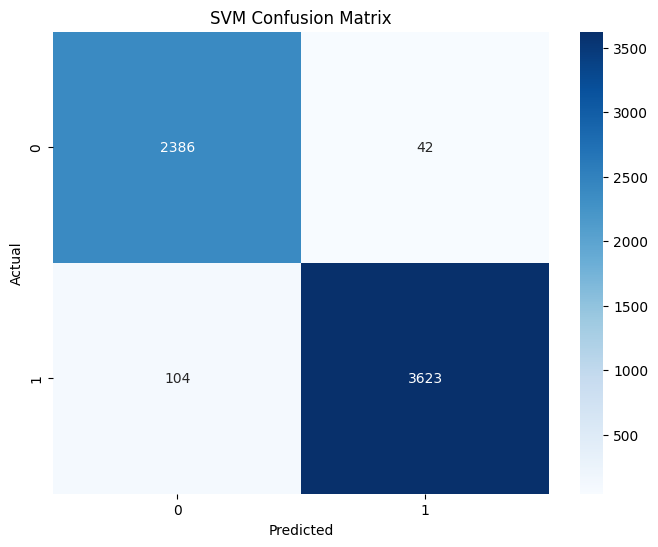

In [53]:
# Membuat plot confusion matrix untuk model SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_model.predict(X_test_tfidf)), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

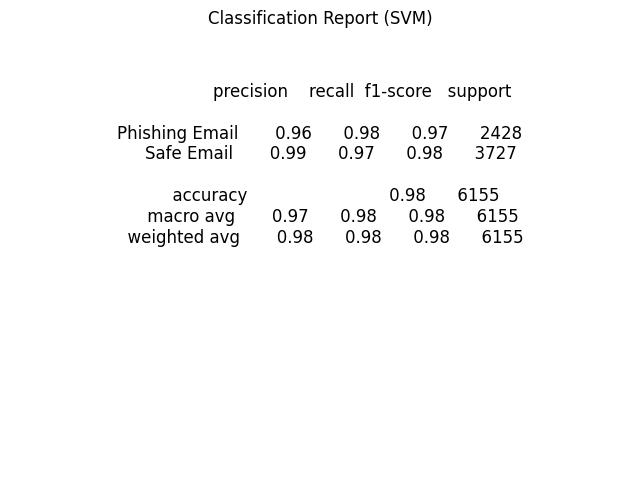

In [62]:
# Membuat plot confusion matrix untuk model Decision Tree
classification_rep = classification_report(y_test, svm_model.predict(X_test_tfidf))

# Membuat plot classification report untuk model SVM
plt.figure(figsize=(8, 6))
plt.text(0.5, 0.5, classification_rep, fontsize=12, ha='center')
plt.axis('off')
plt.title('Classification Report (SVM)')
plt.show()

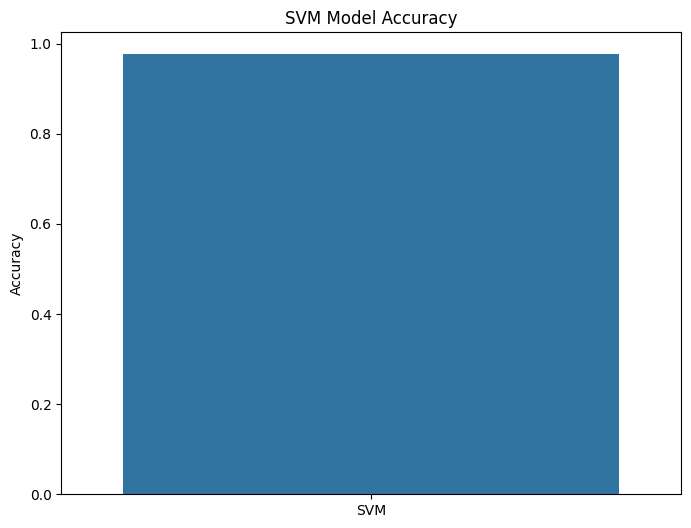

In [64]:
# Membuat plot akurasi model SVM
plt.figure(figsize=(8, 6))
sns.barplot(x=['SVM'], y=[accuracy_score(y_test, svm_model.predict(X_test_tfidf))])
plt.title('SVM Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

### Visualisasi Model Decision Tree

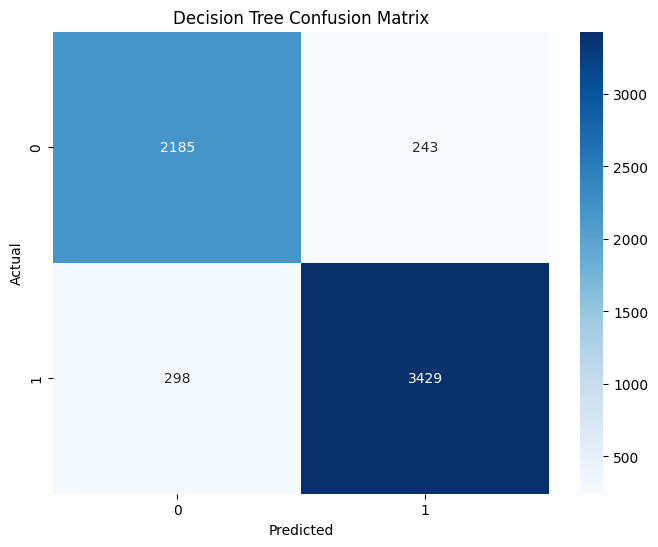

In [65]:
# Membuat plot confusion matrix untuk model Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, decision_tree_model.predict(X_test_tfidf)), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

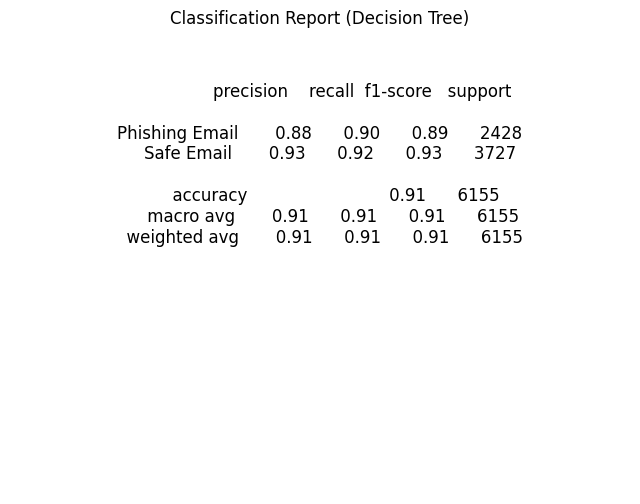

In [67]:
# Membuat plot classification report untuk model Decision Tree
classification_rep = classification_report(y_test, decision_tree_model.predict(X_test_tfidf))

# Memplot classification report
plt.figure(figsize=(8, 6))
plt.text(0.5, 0.5, classification_rep, fontsize=12, ha='center')
plt.axis('off')
plt.title('Classification Report (Decision Tree)')
plt.show()

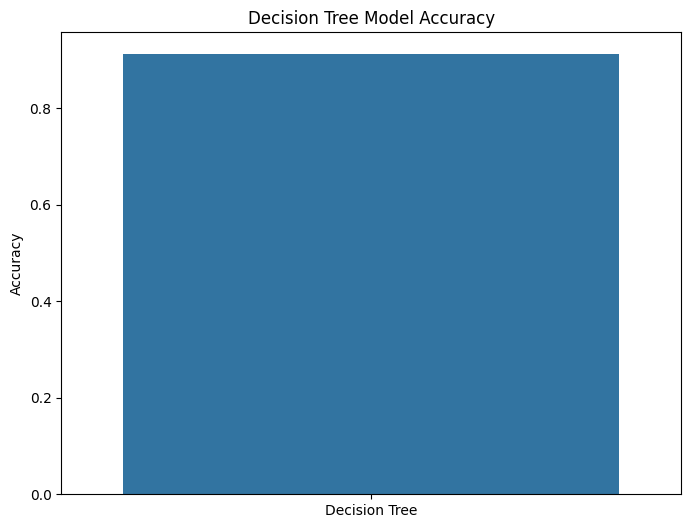

In [79]:
# Membuat plot akurasi model Decision Tree
plt.figure(figsize=(8, 6))
sns.barplot(x=['Decision Tree'], y=[accuracy_score(y_test, decision_tree_model.predict(X_test_tfidf))])
plt.title('Decision Tree Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

### Visualisasi Model Naive Bayes

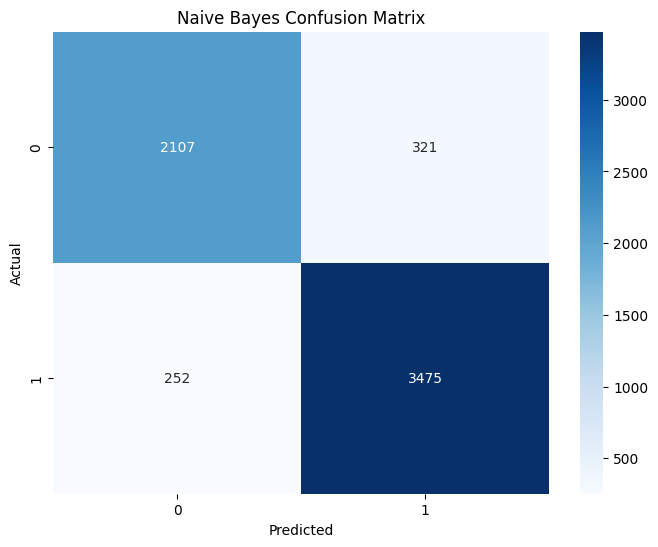

In [71]:
# Membuat plot confusion matrix untuk model Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, naive_bayes_model.predict(X_test_tfidf.toarray())), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

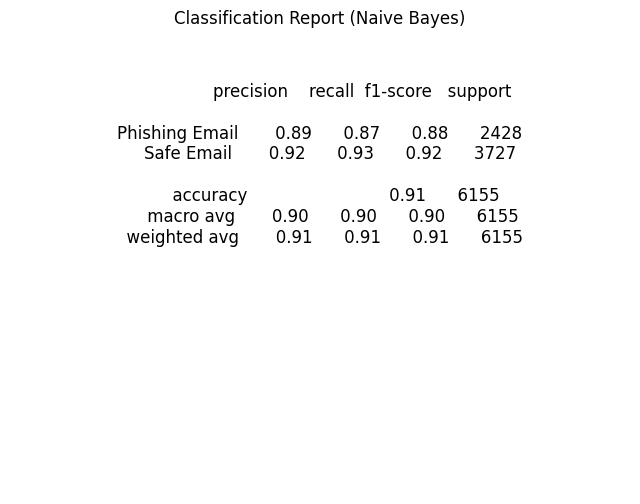

In [72]:
# Membuat plot classification report untuk model Naive Bayes
classification_rep = classification_report(y_test, naive_bayes_model.predict(X_test_tfidf.toarray()))

# Memplot classification report
plt.figure(figsize=(8, 6))
plt.text(0.5, 0.5, classification_rep, fontsize=12, ha='center')
plt.axis('off')
plt.title('Classification Report (Naive Bayes)')
plt.show()

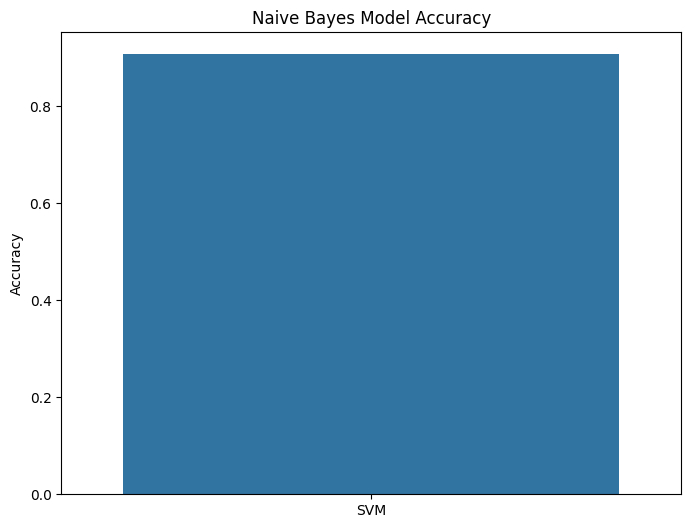

In [73]:
# Membuat plot akurasi model Naive Bayes
plt.figure(figsize=(8, 6))
sns.barplot(x=['Naive Bayes'], y=[accuracy_score(y_test, naive_bayes_model.predict(X_test_tfidf.toarray()))])
plt.title('Naive Bayes Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

### Visualisasi Model Neural Network

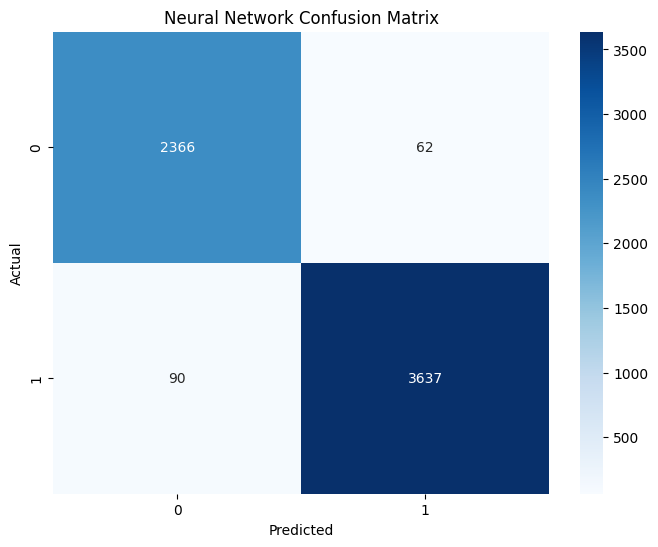

In [75]:
# Membuat plot confusion matrix untuk model Neural Network
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, neural_network_model.predict(X_test_tfidf)), annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

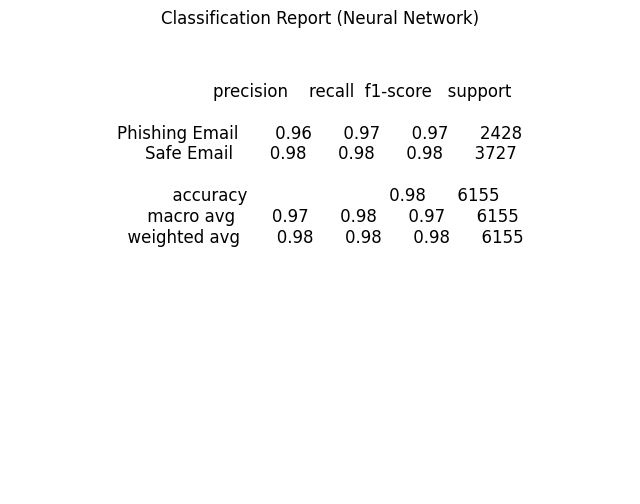

In [77]:
# Membuat plot classification report untuk model Neural Network
classification_rep = classification_report(y_test, neural_network_model.predict(X_test_tfidf))

# Membuat plot classification report
plt.figure(figsize=(8, 6))
plt.text(0.5, 0.5, classification_rep, fontsize=12, ha='center')
plt.axis('off')
plt.title('Classification Report (Neural Network)')
plt.show()

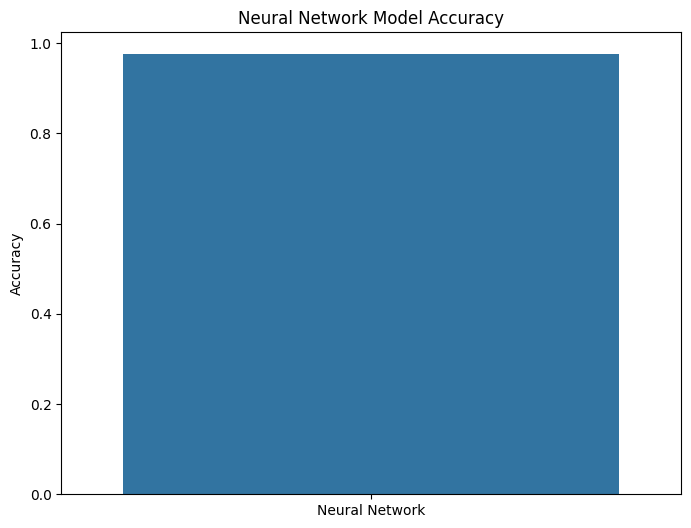

In [78]:
# Membuat plot akurasi model Neural Network
plt.figure(figsize=(8, 6))
sns.barplot(x=['Neural Network'], y=[accuracy_score(y_test, neural_network_model.predict(X_test_tfidf))])
plt.title('Neural Network Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

## Perbandingan akurasi SVM, Decision Tree, Naive Bayes, dan Neural Network

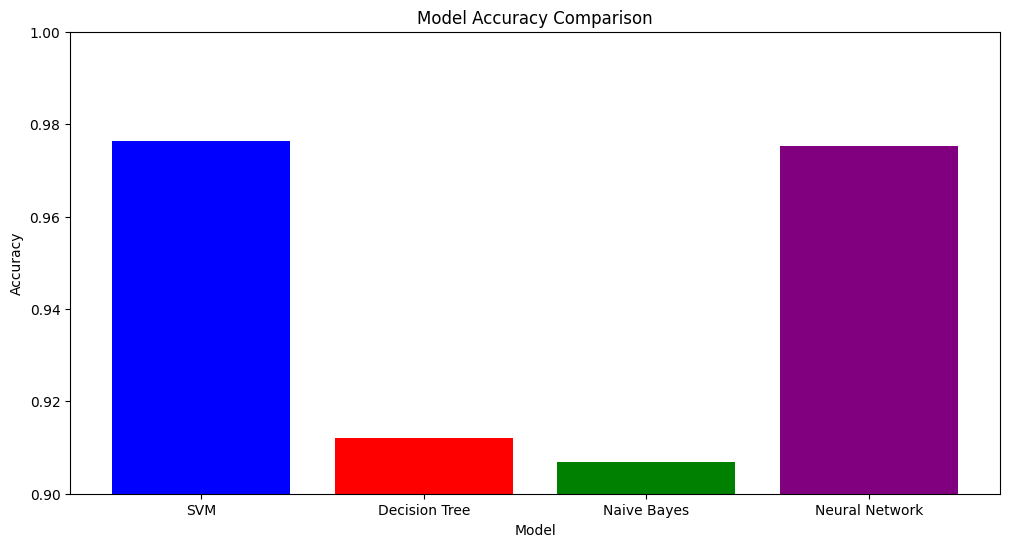

In [101]:
# Membuat perbandingan performa model
models = ['SVM', 'Decision Tree', 'Naive Bayes', 'Neural Network']
accuracies = [accuracy_score(y_test, svm_model.predict(X_test_tfidf)),
              accuracy_score(y_test, decision_tree_model.predict(X_test_tfidf)),
              accuracy_score(y_test, naive_bayes_model.predict(X_test_tfidf.toarray())),
              accuracy_score(y_test, neural_network_model.predict(X_test_tfidf))]

# Membuat plot perbandingan performa model
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['blue', 'red', 'green', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.show()

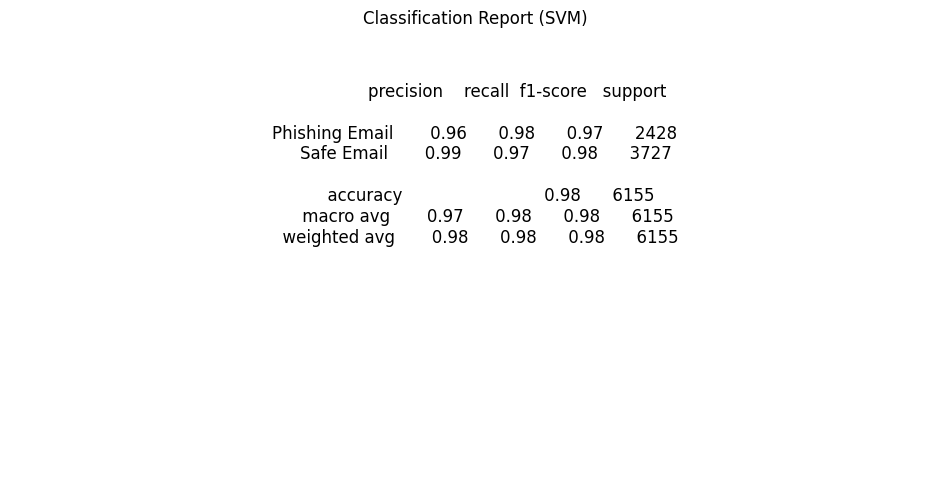

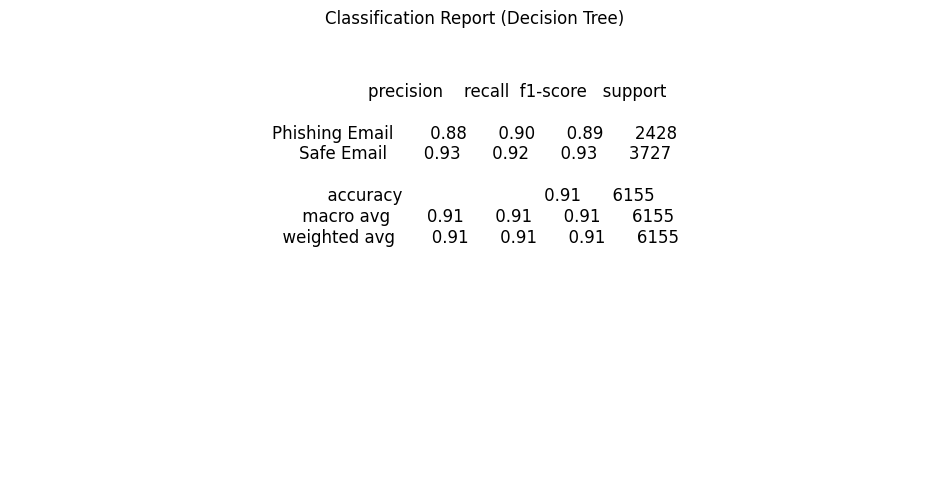

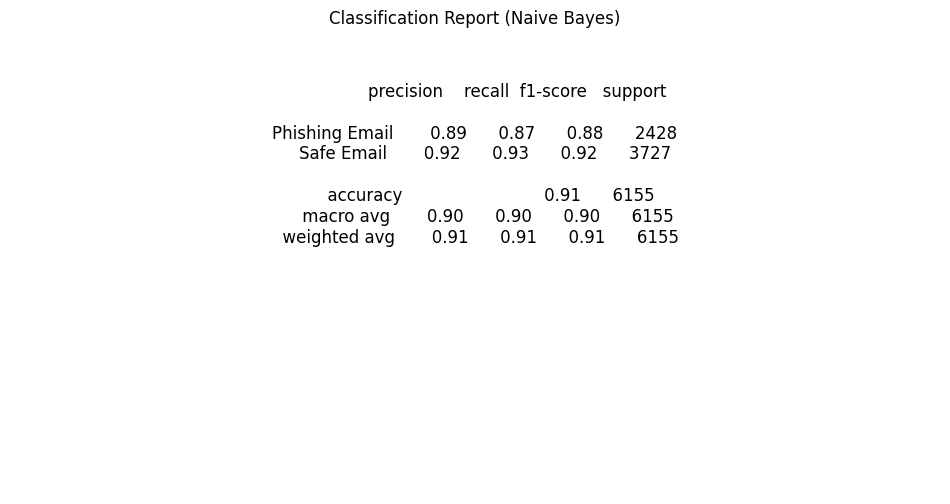

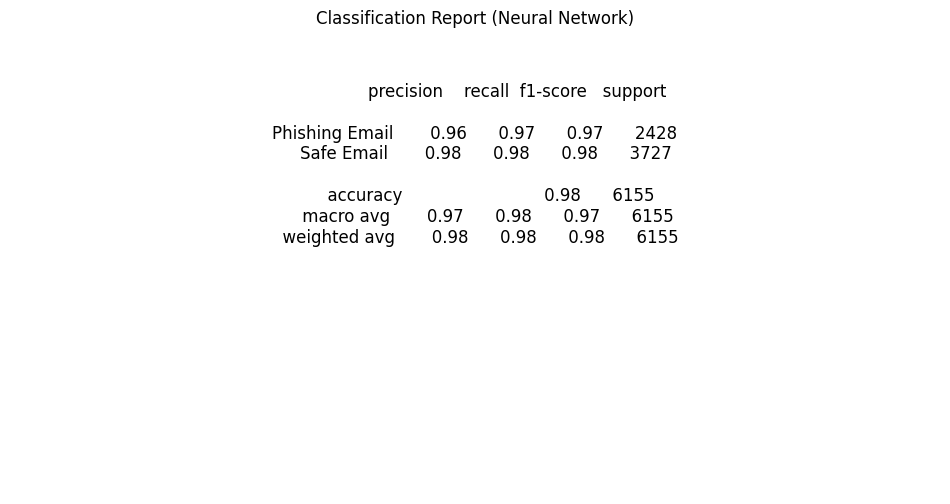

In [102]:
# Membuat perbandingan classification report pada model
svm_classification_rep = classification_report(y_test, svm_model.predict(X_test_tfidf))
decision_tree_classification_rep = classification_report(y_test, decision_tree_model.predict(X_test_tfidf))
naive_bayes_classification_rep = classification_report(y_test, naive_bayes_model.predict(X_test_tfidf.toarray()))
neural_network_classification_rep = classification_report(y_test, neural_network_model.predict(X_test_tfidf))

# Membuat plot perbandingan classification report pada model
plt.figure(figsize=(12, 6))
plt.text(0.5, 0.5, svm_classification_rep, fontsize=12, ha='center')
plt.axis('off')
plt.title('Classification Report (SVM)')
plt.show()

plt.figure(figsize=(12, 6))
plt.text(0.5, 0.5, decision_tree_classification_rep, fontsize=12, ha='center')
plt.axis('off')
plt.title('Classification Report (Decision Tree)')
plt.show()

plt.figure(figsize=(12, 6))
plt.text(0.5, 0.5, naive_bayes_classification_rep, fontsize=12, ha='center')
plt.axis('off')
plt.title('Classification Report (Naive Bayes)')
plt.show()

plt.figure(figsize=(12, 6))
plt.text(0.5, 0.5, neural_network_classification_rep, fontsize=12, ha='center')
plt.axis('off')
plt.title('Classification Report (Neural Network)')
plt.show()

# 8. Prediksi

In [83]:
def predict_email(email_text):
    # Load the model
    with open(model_file, 'rb') as file:
        model = pickle.load(file)
    
    # Melakukan transform pada email text
    email_text_tfidf = vectorizer.transform([email_text])
    
    # Memprediksi email
    prediction = model.predict(email_text_tfidf)
    
    return prediction[0]

# Prediksi email
email_text = """
Subject: Project Deadline Extended

Hi Team,

Due to unforeseen circumstances, the project deadline has been extended by one week. Please adjust your schedules accordingly and continue to work diligently.

Best regards,
John Smith
Project Lead


"""

email_text2 = """
Subject: Action Required: Verify Your Account

Dear Customer,

We noticed some suspicious activity in your account. Please verify your identity by clicking the link below to avoid service interruption.

[Fake Verification Link]

Thank you for your cooperation.

Best Regards,
Customer Support

"""

prediction = predict_email(email_text)
print(f'The email is a {prediction}.')
prediction2 = predict_email(email_text2)
print(f'The email is a {prediction2}.')

The email is a Safe Email.
The email is a Phishing Email.
